### Dieses Beispiel verdeutlicht die Verarbeitung externer Messdaten

#### 1. Schritt: notwendige Bibliotheken importieren und csv-Datei einlesen
Die hier verwendete Beispieldatei finden Sie unter folgender URL: https://s3.amazonaws.com/dq-blog-files/fortune500.csv 
Legen Sie diese oder eine von Ihnen ausgewählte csv-Datei im Verzeichnis des Jupyter-Notebooks ab.

In [12]:
import pandas as pd     # Bibliothek für Datenanalyse und Manipulation
import matplotlib.pyplot as plt # Bibliothek für grafische Darstellung von Daten

# Einlesen der csv-Datei
meineDaten = pd.read_csv('fortune500.csv')




In [13]:
#### 2. Schritt: die eingelesenen Daten anschauen, Benennungen anpassen und Anzahl ermitteln

Nun schauen wir uns die ersten Eintäge und die letzten Einträge dieser Datei an

In [14]:
meineDaten.head() # zeigt die ersten Einträge der Datei

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [15]:
meineDaten.tail() # zeigt die letzten Einträge der Datei

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Jetzt benennen wir die Spalten um, da wir dann leichter auf die einzelnen Spalten zugreifen können.

In [16]:
meineDaten.columns = ['Jahr', 'Rang', 'Firma', 'Einnahmen', 'Gewinn']
meineDaten.head()

,Jahr,Rang,Firma,Einnahmen,Gewinn
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


Jetzt ermitteln wir die Anzahl der Datensätze und schauen uns die darin vorkommenden Datentypen an

In [17]:
print("Anzahl der enthaltenen Datensätze: ", len(meineDaten))
meineDaten.dtypes


Anzahl der enthaltenen Datensätze:  25500


Jahr           int64
Rang           int64
Firma         object
Einnahmen    float64
Gewinn        object
dtype: object

Warum sind denn die Daten in der Splate Gewinn nicht vom Typ float? 
Schauen wir doch mal, ob dort nicht vielleicht Einträge vorhanden sind, die nicht numerisch sind...

In [18]:
nicht_numerisch = meineDaten.Gewinn.str.contains('[^0-9.-]')
meineDaten.loc[nicht_numerisch].head()

,Jahr,Rang,Firma,Einnahmen,Gewinn
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Das kann auch in Messdatenlisten passieren, wenn z.B. ein nicht plausibler Messwert gespeichert wurde.
Nun gucken wir mal wie viele nicht-numerische Daten dort enthalten sind.

### Schritt 3: Ermitteln der nicht numerischen Datensätze

In [19]:
set(meineDaten.Gewinn[nicht_numerisch])
print("Anzahl der nicht numerischen Datensätze: ", len(meineDaten.Gewinn[nicht_numerisch]))

Anzahl der nicht numerischen Datensätze:  369


Jetzt gucken wir mal wie diese verteilt sind.

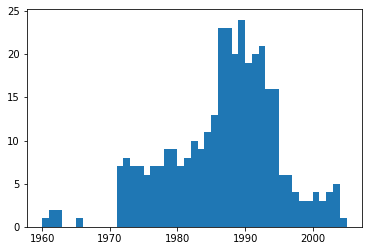

In [20]:
bin_sizes, _, _ = plt.hist(meineDaten.Jahr[nicht_numerisch], bins=range(1960, 2006))

Nun sollten wir die Datensätze entfernen, damit nur noch Einträge vom Typ float enthalten sind.

In [21]:
meineDaten = meineDaten.loc[~nicht_numerisch]
meineDaten.Gewinn = meineDaten.Gewinn.apply(pd.to_numeric)

In [22]:
print("Neue Anzahl der Datensätze: ", len(meineDaten))

Neue Anzahl der Datensätze:  25131


Jetzt können wir die Datentypen erneut abfragen und werden sehen, dass auch die Daten in der Spalte Gewinn vom Typ float sind.

In [23]:
meineDaten.dtypes

Jahr           int64
Rang           int64
Firma         object
Einnahmen    float64
Gewinn       float64
dtype: object